In [40]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(arr):
    if arr.dtype != 'bool':
        raise ValueError('argument should be a boolean ndarray')
    colors = np.empty(arr.shape, dtype='U5')
    colors[:] = 'red'
    colors[arr] = 'black'
    x, y = np.indices((arr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

In [41]:
def metropolis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [0]
    for i in range(niter):
        index = np.random.choice(8,2)
        proposed = proposal(current, index, **kwargs)
        p = value(current, **kwargs)
        p /= value(proposed, **kwargs)
        if np.random.uniform() > p:
            current = proposed
        else:
            current[index[0]][index[1]] = 0;
        post.append(round(np.sum(current)))
    return post[nburn:], current

In [42]:
def value(current, **kwargs):
    _ = kwargs
    return current.sum()

def proposal(current, index, size=8, **kwargs):
    _ = kwargs
    index = np.random.choice(size, 2)
    
    s=0
    if index[0]!=0:
        s+=current[index[0]-1][index[1]]
    if index[0]!=size - 1:
        s+=current[index[0]+1][index[1]]
    if index[1]!=0:
        s+=current[index[0]][index[1]-1]
    if index[1]!=size - 1:
        s+=current[index[0]][index[1]+1]
    
    if s==0:
        current[index[0]][index[1]] = 1
    else:
        current[index[0]][index[1]] = 0
    return current

In [43]:
size = 8
post, graph = metropolis(np.zeros((size, size)), value, proposal, 20000)

1. Оценить  E𝑛(𝜉)  с помощью МСМС для графа 8х8

In [44]:
print("Оценка числа закрашенных вершин для графа 8х8:")
print(np.sum(post)/len(post))

Оценка числа закрашенных вершин для графа 8х8:
15.239738013099345


2. Обосновать численно и графически стационарность

In [45]:
from scipy import stats
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

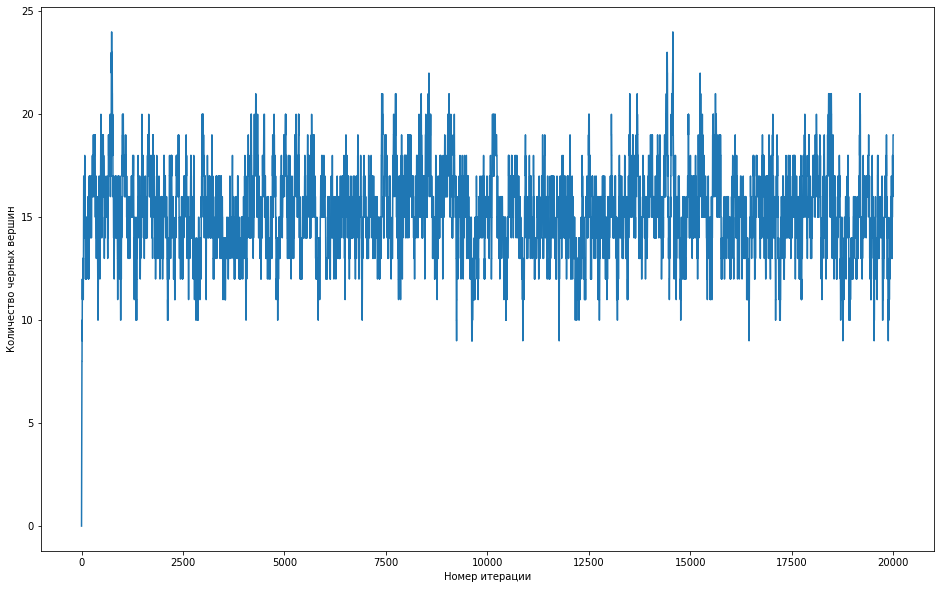

In [50]:
plt.figure(figsize=(16,10))
plt.plot(post)
plt.ylabel("Количество черных вершин", size=10)
plt.xlabel("Номер итерации", size=10)
plt.show()

In [47]:
g_test(post[5000:])

Ttest_indResult(statistic=1.387831462065982, pvalue=0.16531950264852738)

Стационарность подтверждается

3. Построить график распределеиня  𝑛(𝜉) 

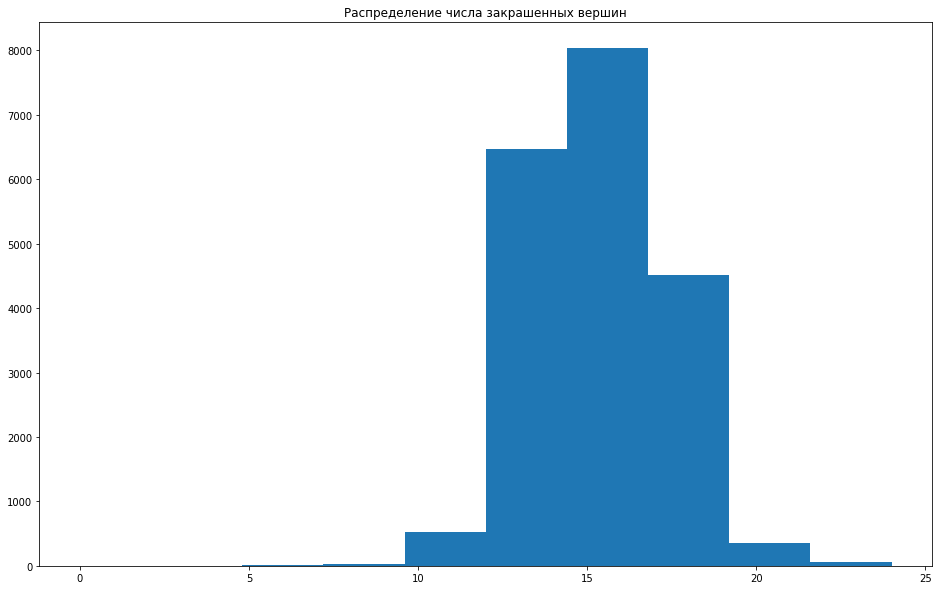

In [48]:
plt.figure(figsize=(16, 10))
plt.hist(post)
plt.title("Распределение числа закрашенных вершин")
plt.show()

4. Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.

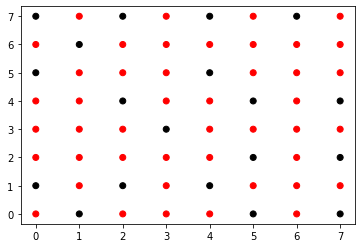

In [49]:
plot_grid(graph.astype('bool'))